# KNN Notebook

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier


# Read the CSV and Preform Basic Data Cleaning

In [2]:
gender_df = pd.read_csv("data/gender_submission.csv")
test_df = pd.read_csv("data/test.csv")
train_df = pd.read_csv("data/train.csv")

In [3]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
gender_df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [6]:
##### Use the following fields in the model 
# Pclass, Sex, age, SibSp, Parch, fare 

##### Test and training variable sources (csv files)
# X_train - train.csv - split the survived into y_train 
# X_test - test.csv 
# y_train - target - survived from the train.csv 
# y_test - gender file 

# Establish the training sets

In [7]:
X_train = train_df[['Pclass', 'Sex', 'Survived','Age', 'SibSp', 'Parch', 'Fare']]

In [8]:
# Drop null values
X_train = X_train.dropna()

In [9]:
# Set the target variable
y_train = X_train['Survived']

In [10]:
y_train = y_train.values.reshape(-1, 1)

In [11]:
y_train.shape

(714, 1)

In [12]:
# Drop the target variable from X_train
X_train = X_train[['Pclass', 'Sex','Age', 'SibSp', 'Parch', 'Fare']]

In [13]:
X_train.shape

(714, 6)

# Clean data for the test sets

In [14]:
# merge gender_df and test_df
merged_test_df = test_df.merge(gender_df, on='PassengerId')

In [15]:
merged_test_df  

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


In [16]:
merged_test_df = merged_test_df[['Pclass', 'Sex', 'Survived','Age', 'SibSp', 'Parch', 'Fare']]

In [17]:
merged_test_df

,Pclass,Sex,Survived,Age,SibSp,Parch,Fare
0,3,male,0,34.5,0,0,7.8292
1,3,female,1,47.0,1,0,7.0000
2,2,male,0,62.0,0,0,9.6875
3,3,male,0,27.0,0,0,8.6625
4,3,female,1,22.0,1,1,12.2875
...,...,...,...,...,...,...,...
413,3,male,0,NaN,0,0,8.0500
414,1,female,1,39.0,0,0,108.9000
415,3,male,0,38.5,0,0,7.2500
416,3,male,0,NaN,0,0,8.0500


In [18]:
# Remove all null values from the testing set
merged_test_df = merged_test_df.dropna()

# Establish X and y test sets

In [19]:
X_test = merged_test_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]

In [20]:
X_test.shape

(331, 6)

In [21]:
y_test = merged_test_df['Survived']

In [22]:
y_test = y_test.values.reshape(-1,1)

In [23]:
# y_test = y_test.values.reshape(-1, 1)
y_test.shape

(331, 1)

# Encode the gender data

In [24]:
# Encode the sex column in the test set
X_test = X_test.copy()

X_test = pd.get_dummies(X_test, columns=["Sex"])
X_test.shape

(331, 7)

In [25]:
X_test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,3,34.5,0,0,7.8292,0,1
1,3,47.0,1,0,7.0000,1,0
2,2,62.0,0,0,9.6875,0,1
3,3,27.0,0,0,8.6625,0,1
4,3,22.0,1,1,12.2875,1,0


In [26]:
# Encode the sex column in the train set
X_train = X_train.copy()

X_train = pd.get_dummies(X_train, columns=["Sex"])
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,3,22.0,1,0,7.2500,0,1
1,1,38.0,1,0,71.2833,1,0
2,3,26.0,0,0,7.9250,1,0
3,1,35.0,1,0,53.1000,1,0
4,3,35.0,0,0,8.0500,0,1


# Scale the data

In [27]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [28]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

# Create, fit and validate the K Nearest Neighbor model

C:\Users\kdmcc\anaconda3\envs\PythonData38\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\kdmcc\anaconda3\envs\PythonData38\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\kdmcc\anaconda3\envs\PythonData38\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\kdmcc\anaconda3\envs\PythonData38\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was pas

k: 1, Train/Test Score: 0.983/0.737
k: 3, Train/Test Score: 0.881/0.795
k: 5, Train/Test Score: 0.863/0.822
k: 7, Train/Test Score: 0.836/0.864
k: 9, Train/Test Score: 0.836/0.867
k: 11, Train/Test Score: 0.842/0.858


C:\Users\kdmcc\anaconda3\envs\PythonData38\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\kdmcc\anaconda3\envs\PythonData38\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\kdmcc\anaconda3\envs\PythonData38\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\kdmcc\anaconda3\envs\PythonData38\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was pas

k: 13, Train/Test Score: 0.835/0.864
k: 15, Train/Test Score: 0.831/0.876
k: 17, Train/Test Score: 0.833/0.885
k: 19, Train/Test Score: 0.832/0.897


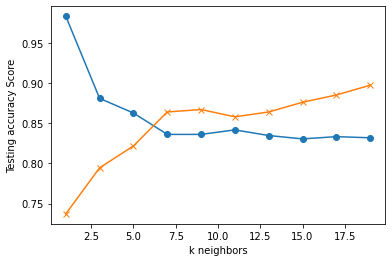

In [36]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
# plt.show()
plt.savefig("resource/images/K_Nearest_Neighbor.png")

In [30]:
# Note that k: 6 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train_scaled, y_train)
print('k=6 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=6 Test Acc: 0.867


C:\Users\kdmcc\anaconda3\envs\PythonData38\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [31]:
# Validate the model using the test data
print(f'Training Data Score: {knn.score(X_train, y_train)}')
print(f'Testing Data Score: {knn.score(X_test, y_test)}')

Training Data Score: 0.6386554621848739
Testing Data Score: 0.5770392749244713


# Make predictions

In [32]:
# Generate a new data point
import numpy as np

### Prediction person data (Pclass = 1, 2, or 3)
Pclass = 1
Age = 20 
SibSp = 1 
Parch = 0
Fare = 75
Sex_female = 1
Sex_male = 0

new_person = np.array([[Pclass, Age, SibSp, Parch, Fare, Sex_female, Sex_male]])
new_person

array([[ 1, 20,  1,  0, 75,  1,  0]])

In [33]:
# Predict whether or not the new person survives
predictions = knn.predict(new_person)

if predictions == 0:
    print(f"This person would probably perish on the Titanic")
else:
    print(f"This person would probably survive on the Titanic")

This person would probably survive on the Titanic


In [34]:
### Prediction number 2
Pclass = 3
Age = 45 
SibSp = 1 
Parch = 2
Fare = 20
Sex_female = 0
Sex_male = 1

new_person2 = np.array([[Pclass, Age, SibSp, Parch, Fare, Sex_female, Sex_male]])
new_person2

array([[ 3, 45,  1,  2, 20,  0,  1]])

In [35]:
# Predict whether or not the new person survives
predictions_2 = knn.predict(new_person2)
if predictions_2 == 0:
    print(f"This person would probably perish on the Titanic")
else:
    print(f"This person would probably survive on the Titanic")

This person would probably survive on the Titanic
